# Lista 2


In [67]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

## Questão 1

In [45]:
X = np.array([5, 5, 0, 4, 3, 5, 1, 2, 5, 0])

In [46]:
np.mean(X)

3.0

In [47]:
np.std(X)

2.0

(array([2., 0., 1., 0., 1., 0., 1., 0., 1., 4.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

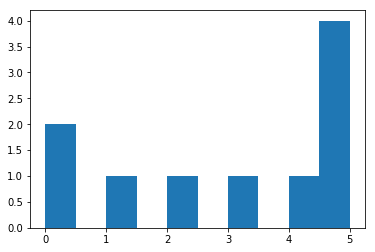

In [48]:
plt.hist(X)

## Questão 2


In [49]:
s = np.random.normal(loc=60, scale=10, size=5000)

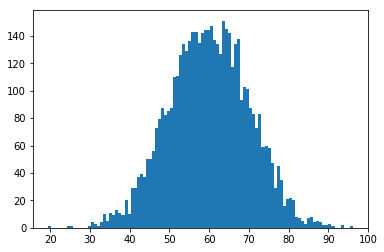

In [50]:
plt.hist(s, bins=100);

## Questão 3

## Poisson

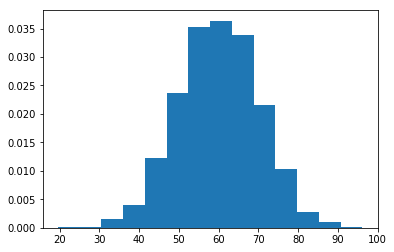

In [51]:
p = np.random.poisson(5, 10000)
count, bins, ignored = plt.hist(s, 14, normed=True)
plt.show()

## Gamma


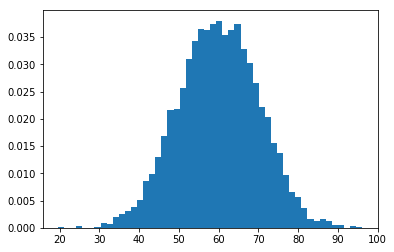

In [52]:
g = np.random.gamma(2., 2., 1000)
count, bins, ignored = plt.hist(s, 50, normed=True)
plt.show()

## Questão 4

## Implementa o gradiente descendente

In [53]:
# y = b0 + b1 * x
# b1 é a inclinação, b0 é y-intercept
def compute_error_for_line_given_points(b0, b1, x, y):
    totalError = np.sum((y - (b1 * x + b0)) ** 2)
    return totalError / float(len(y))

def step_gradient(b0_current, b1_current, x, y, learning_rate):
    N = float(len(y))
    b0_gradient = 2/N * np.sum(-(y - ((b1_current * x) + b0_current)))
    b1_gradient = 2/N * np.sum(-x * (y - ((b1_current * x) + b0_current)))
    new_b0 = b0_current - (learning_rate * b0_gradient)
    new_b1 = b1_current - (learning_rate * b1_gradient)
    return new_b0, new_b1

def gradient_descent_runner(x, y, b0, b1, learning_rate, num_iterations):
    for _ in range(num_iterations):
        b0, b1 = step_gradient(b0, b1, x, y, learning_rate)
    return b0, b1

def run(x, y, initial_b0, initial_b1, learning_rate, num_iterations):
    print("Inicia com b0 = {}, b1 = {}, error = {}".format(initial_b0, initial_b1, compute_error_for_line_given_points(initial_b0, initial_b1, x, y)))  
    print("Executando...")
    b0, b1 = gradient_descent_runner(x, y, initial_b0, initial_b1, learning_rate, num_iterations)
    print("Após {} iterações, obtemos b0 = {}, b1 = {}, error = {}".format(num_iterations, b0, b1, compute_error_for_line_given_points(b0, b1, x, y)))

## Carregando dados


In [54]:
points = np.array([[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]])

## Usando o gradiente

O que ocorre quando você aumenta o valor de learning_rate para 0.01?

In [62]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.0001
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 100000
run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 9.6
Executando...
Após 100000 iterações, obtemos b0 = 0.3943640745118074, b1 = 0.8015610609878734, error = 0.4800057815411337
CPU times: user 2.24 s, sys: 8.02 ms, total: 2.25 s
Wall time: 2.25 s


In [63]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.01
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 100000
run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 9.6
Executando...
Após 100000 iterações, obtemos b0 = 0.39999999999998903, b1 = 0.8000000000000033, error = 0.48000000000000026
CPU times: user 2.49 s, sys: 3.84 ms, total: 2.49 s
Wall time: 2.49 s


Que valores de parâmetros podem ser usados com sucesso para obter um valor satisfatório para a métrica de erro ao usar um valor de learning_rate igual a 0.01?


In [60]:
%%time
x = points[:, 0]
y = points[:, 1]
learning_rate = 0.01
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 100000
run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 9.6
Executando...
Após 100000 iterações, obtemos b0 = 0.39999999999998903, b1 = 0.8000000000000033, error = 0.48000000000000026
CPU times: user 2.35 s, sys: 12.2 ms, total: 2.36 s
Wall time: 2.34 s


## Usando scikit learn

In [57]:
%%time
model = linear_model.LinearRegression()
X = [ [i] for i in x ] 
model.fit(X, y)
b0, b1 = model.intercept_, model.coef_
y_pred = model.predict(X)
print("b0 = {}, b1 = {}, error = {}".format(b0, b1, compute_error_for_line_given_points(b0, b1, x, y)))

b0 = 0.39999999999999947, b1 = [0.8], error = 0.47999999999999987
CPU times: user 5.16 ms, sys: 0 ns, total: 5.16 ms
Wall time: 155 ms


## Questão 5

In [85]:
X5 = np.array([[1400], [1600], [1700], [1875], [1100], [1550], [2350], [2450], [1425], [1700]])

In [86]:
X5

array([[1400],
       [1600],
       [1700],
       [1875],
       [1100],
       [1550],
       [2350],
       [2450],
       [1425],
       [1700]])

In [87]:
y = np.array([245000, 312000, 279000, 308000, 199000, 219000, 405000, 324000, 319000, 255000])

In [88]:
y

array([245000, 312000, 279000, 308000, 199000, 219000, 405000, 324000,
       319000, 255000])

In [123]:
learning_rate = 0.00000001
initial_b0 = 0 # y-intercept inicial
initial_b1 = 0 # inclinação inicial
num_iterations = 10000
run(x, y, initial_b0, initial_b1, learning_rate, num_iterations)
b0, b1 = gradient_descent_runner(X, y, initial_b0, initial_b1, learning_rate, num_iterations)

Inicia com b0 = 0, b1 = 0, error = 85342300000.0
Executando...
Após 10000 iterações, obtemos b0 = 1.0874869210586766, b1 = 164.1491548692985, error = 1856133675.0515523


ValueError: operands could not be broadcast together with shapes (10,) (10,2) 

In [105]:
def metrosquad(pe): return pe * 10.764

In [118]:
metrosquad(130.065)

1400.01966

In [124]:
print(metrosquad(130.065)*b1+b0)

[1120.415728]
